# 01COVID 19 South Korea 

# Libraries

In [60]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import display

# Functions

# Visualization Features

In [61]:
sns.set_context("paper", font_scale=2.0)

ord_color = "bisque"
spec_lev1 = "crimson"

# Display Features

In [62]:
pd.set_option("max_rows", None)

# Did Gender Affect who Got COVID and who Died from COVID?

## Load Data

In [63]:
gender = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\gender.csv",
    index_col=False,
    skipinitialspace=True,
)

## Size

In [64]:
gender.shape

(242, 5)

## Missing Data

In [65]:
gender.isna().sum()

date         0
time         0
sex          0
confirmed    0
deceased     0
dtype: int64

## Delete Unneeded Columns

In [66]:
gender = gender.drop(["time"], axis=1)

## Rename Columns

In [67]:
gender.rename(
    columns={
        "date": "Date",
        "sex": "Gender",
        "confirmed": "Confirmed",
        "deceased": "Deceased",
    },
    inplace=True,
)

## Rename Column Values

In [68]:
gender.replace('male', 'Male', inplace = True)
gender.replace('female', 'Female', inplace = True)

## First 5 Rows

In [69]:
gender.head()

,Date,Gender,Confirmed,Deceased
0,3/2/2020,Male,1591,13
1,3/2/2020,Female,2621,9
2,3/3/2020,Male,1810,16
3,3/3/2020,Female,3002,12
4,3/4/2020,Male,1996,20


## The Gender Factor 

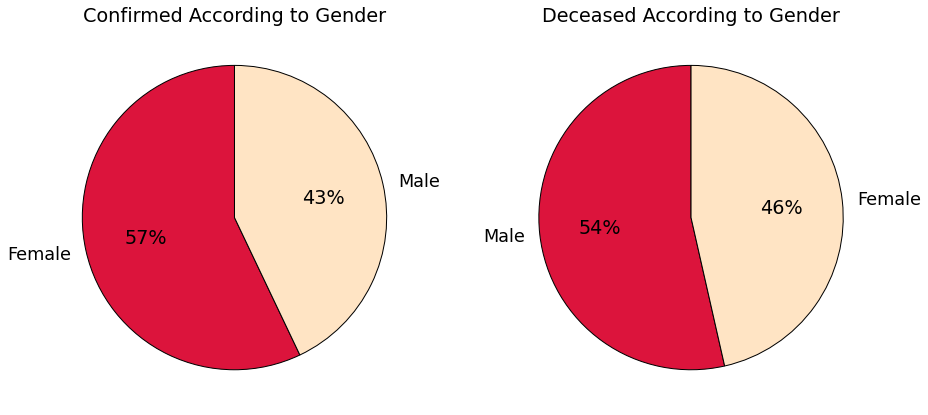

In [70]:
confirmed = gender[['Gender', 'Confirmed']].groupby(['Gender']).max().sort_values('Confirmed', ascending=False)
confirmed = confirmed.reset_index()

deceased = gender[['Gender', 'Deceased']].groupby(['Gender']).max().sort_values('Deceased', ascending=True)
deceased = deceased.reset_index()

data_confirmed = [confirmed.loc[0, "Confirmed"], confirmed.loc[1, "Confirmed"]]
labels_confirmed = ["Female", "Male"]
colors_confirmed = [spec_lev1, ord_color]

data_deceased = [deceased.loc[1, "Deceased"], deceased.loc[0, "Deceased"]]
labels_deceased = ["Male", "Female"]
colors_deceased = [spec_lev1, ord_color]


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

ax1.set_title("Confirmed According to Gender")
ax1.pie(
    data_confirmed,
    labels=labels_confirmed,
    colors=colors_confirmed,
    autopct="%0.0f%%",
    startangle=90,
    wedgeprops={"edgecolor": "black", "linewidth": 1},
)


ax2.set_title("Deceased According to Gender")
ax2.pie(
    data_deceased,
    labels=labels_deceased,
    colors=colors_deceased,
    autopct="%0.0f%%",
    startangle=90,
    wedgeprops={"edgecolor": "black", "linewidth": 1},
)

plt.show();

# Did Age Affect who Got COVID and Who Died from it? 

## Load Data

In [82]:
age = pd.read_csv("C:\py\Projects\TuringCollege\COVID19\DataSets\\age.csv", parse_dates=["date"])

## Size

In [83]:
age.shape

(1089, 5)

## Missing Data

In [84]:
age.isna().sum()

date         0
time         0
age          0
confirmed    0
deceased     0
dtype: int64

## Rename Columns

In [85]:
age.rename(
    columns={
        "date": "Date",
        "age": "Age",
        "confirmed": "Confirmed",
        "deceased": "Deceased",
    },
    inplace=True,
)

## Delete Unneeded Columns 

In [86]:
pd.set_option("max_rows", None)
age.drop('time', inplace = True, axis = 1)

## The First Five Rows

In [87]:
age.head()

,Date,Age,Confirmed,Deceased
0,2020-03-02,0s,32,0
1,2020-03-02,10s,169,0
2,2020-03-02,20s,1235,0
3,2020-03-02,30s,506,1
4,2020-03-02,40s,633,1


## The Age Factor

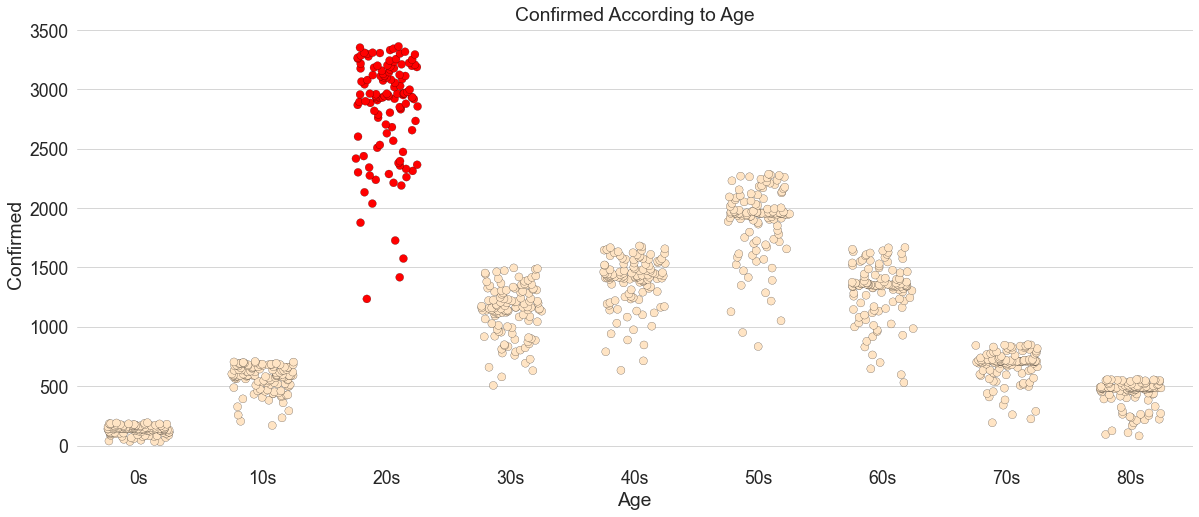

In [92]:
confirmed_by_age = (
    age[["Age", "Confirmed"]]
    .groupby(["Age"])
    .max()
    .sort_values("Confirmed", ascending=False)
)

confirmed_by_age = confirmed_by_age.reset_index()


plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")

ord_color = "bisque"
spec_lev1 = "red"
spec_lev2 = 'orangered'
spec_lev3 = "lightcoral"

palette = {
    "0s": ord_color,
    "10s": ord_color,
    "20s": spec_lev1,
    "30s": ord_color,
    "40s": ord_color,
    "50s": ord_color,
    "60s": ord_color,
    "70s": ord_color,
    "80s": ord_color, 
}

sns.stripplot(
    data=age,
    x="Age",
    y="Confirmed",
    jitter=0.25,
    size=8,
    linewidth=0.2,
    edgecolor="black",
    palette= palette,
)

sns.despine(left=True, bottom=True)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
plt.xlabel("Age")
plt.ylabel("Confirmed")
plt.title("Confirmed According to Age");

In [93]:
deceased_by_age = (
    age[["Age", "Deceased"]]
    .groupby(["Age"])
    .max()
    .sort_values("Deceased", ascending=False)
)

deceased_by_age = deceased_by_age.reset_index()

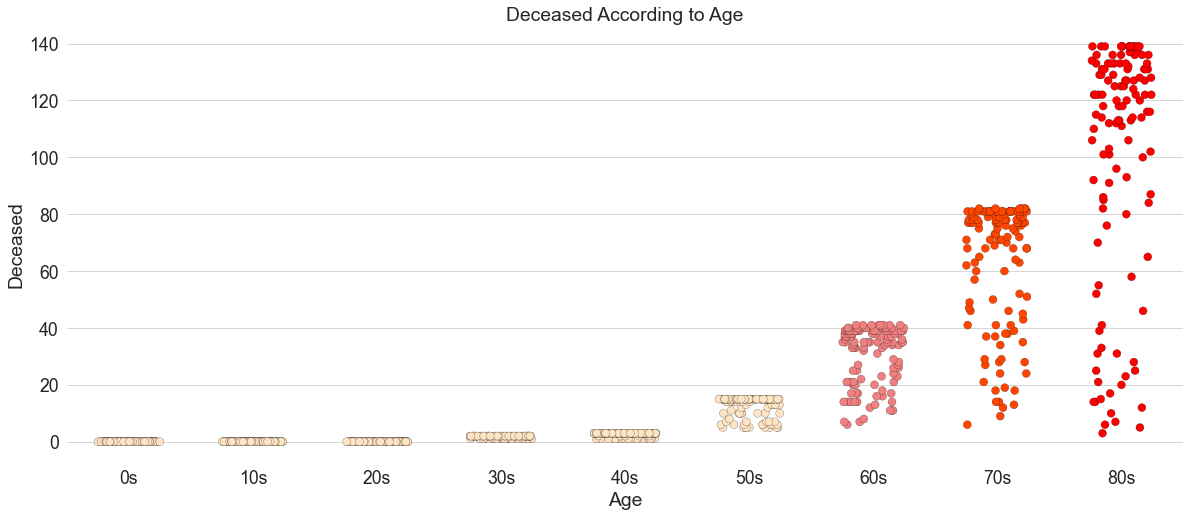

In [94]:
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=2.0)

ord_color = "bisque"
spec_lev1 = "red"
spec_lev2 = 'orangered'
spec_lev3 = "lightcoral"

palette = {
    "0s": ord_color,
    "10s": ord_color,
    "20s": ord_color,
    "30s": ord_color,
    "40s": ord_color,
    "50s": ord_color,
    "60s": spec_lev3,
    "70s": spec_lev2,
    "80s": spec_lev1, 
}

sns.stripplot(
    data=age,
    x="Age",
    y="Deceased",
    jitter=0.25,
    size=8,
    linewidth=0.2,
    edgecolor='Black',
    palette= palette,

);

sns.despine(left=True, bottom=True)
plt.xlabel("Age")
plt.ylabel("Deceased")
plt.title("Deceased According to Age");

# Did Any One Population Have a Major Affect on COVID19 Infections?

## Load Data

In [71]:
case = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\\case.csv",
    index_col=False,
    skipinitialspace=True,
)

## Size

In [72]:
case.shape

(174, 8)

## Missing Data

In [73]:
case.isna().sum()

case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

## Delete Unneeded Columns

In [74]:
case = case.drop(["case_id", "city", "group", "latitude", "longitude"], axis=1)

## Delete Unneeded Row

In [75]:
case = case[case.infection_case != 'etc']

## Rename Columns

In [76]:
case.rename(
    columns={
        "province": "Province",
        "infection_case": "Infection Reason",
        "confirmed": "Confirmed",
    },
    inplace=True,
)

## Rename Column Values

In [77]:
case.replace('contact with patient', 'Contact with Patient', inplace=True)
case.replace('overseas inflow', 'Overseas Inflow', inplace=True)
case.replace('gym facility in Cheonan', 'Gym Facility in Cheonan', inplace=True)
case.replace('Door-to-door sales in Daejeon', 'Door-to-Door Sales in Daejeon', inplace=True)
case.replace('gym facility in Cheonan', 'Gym Facility in Cheonan', inplace=True)
case.replace('Geumcheon-gu rice milling machine manufacture', 'Geumcheon-gu Rice Milling Machine Manufacture', inplace=True)
case.replace('Lotte Confectionery logistics center', 'Lotte Confectionery Logistics Center', inplace=True)
case.replace('gym facility in Sejong', 'Gym Facility in Sejong', inplace=True)
case.replace('Seoul City Hall Station safety worker', 'Seoul City Hall Station Safety Worker', inplace=True)
case.replace('Gangnam Yeoksam-dong gathering', 'Gangnam Yeoksam-dong Gathering', inplace=True)
case.replace('Seongnam neighbors gathering', 'Seongnam neighbors Gathering', inplace=True)
case.replace('Eunpyeong-Boksagol culture center', 'Eunpyeong-Boksagol Culture Center', inplace=True)
case.replace('Biblical Language study meeting', 'Biblical Language Study Meeting', inplace=True)
case.replace('Daejeon door-to-door sales', 'Daejeon Door-to-Door Sales', inplace=True)

## First Five Rows

In [78]:
case.head()

,Province,Infection Reason,Confirmed
0,Seoul,Itaewon Clubs,139
1,Seoul,Richway,119
2,Seoul,Guro-gu Call Center,95
3,Seoul,Yangcheon Table Tennis Club,43
4,Seoul,Day Care Center,43


## The Shincheonji Church Factor

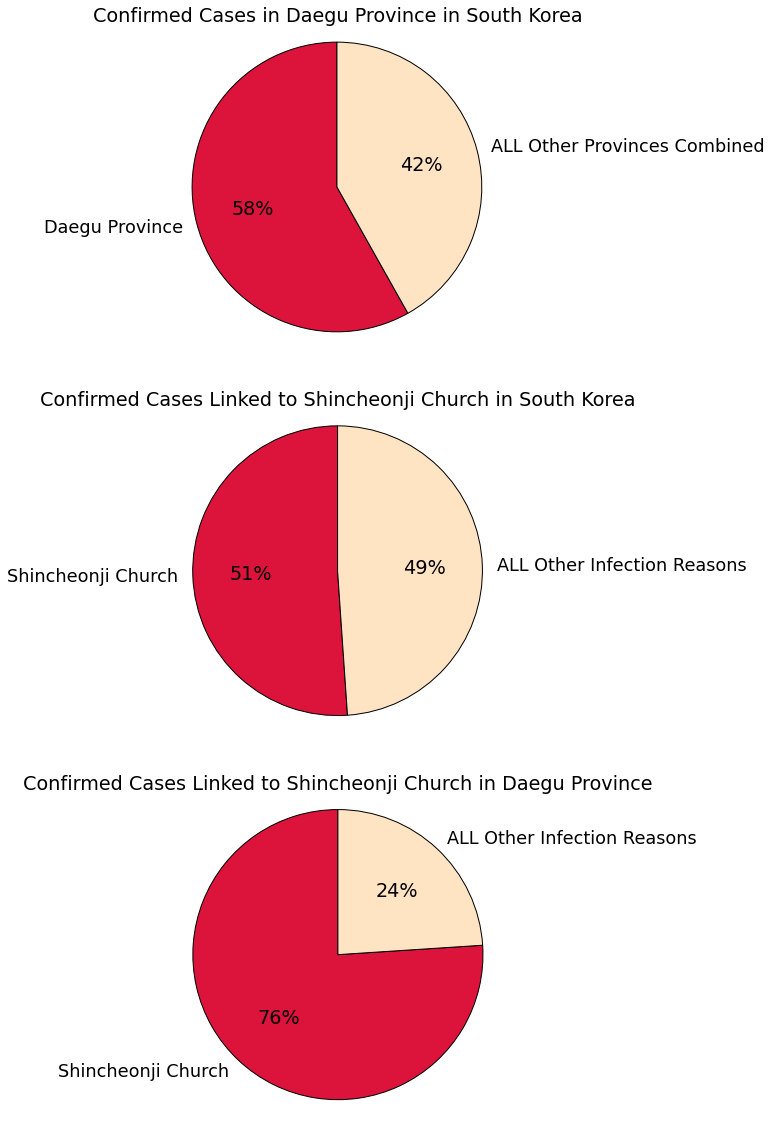

In [81]:
pivot_infection = pd.pivot_table(
    data=case, 
    index=["Infection Reason"], 
    values="Confirmed", 
    aggfunc="sum"
).sort_values("Confirmed", ascending=False)

total = pivot_infection["Confirmed"].sum()


pivot_province = pd.pivot_table(
    data=case, 
    index=["Province"], 
    values="Confirmed", 
    aggfunc="sum"
).sort_values("Confirmed", ascending=False)

daegu = pivot_province.loc["Daegu"]
daegu = daegu["Confirmed"]

other_provinces = total - daegu


shincheonji_church_daegu = case.loc[
    (case["Province"] == "Daegu") & (case["Infection Reason"] == "Shincheonji Church")
]
shincheonji_church_daegu = shincheonji_church_daegu.set_index("Infection Reason")
shincheonji_church_daegu = shincheonji_church_daegu.loc["Shincheonji Church"]
shincheonji_church_daegu = shincheonji_church_daegu["Confirmed"]

other_daegu = daegu - shincheonji_church_daegu


shincheonji_church = pivot_infection.loc["Shincheonji Church"]
shincheonji_church = shincheonji_church["Confirmed"]

other_overall = total - shincheonji_church


data_shincheonji_church_SK = [shincheonji_church, other_overall]
labels_shincheonji_church_SK = ['Shincheonji Church', 'ALL Other Infection Reasons']
colors_shincheonji_church_SK = [spec_lev1, ord_color]

data_shincheonji_church_daegu = [shincheonji_church_daegu, other_daegu]
labels_shincheonji_church_daegu = ['Shincheonji Church', 'ALL Other Infection Reasons']
colors_shincheonji_church_daegu = [spec_lev1, ord_color]

data_daegu = [daegu, other_provinces]
labels_daegu = ['Daegu Province', 'ALL Other Provinces Combined']
colors_daegu = [spec_lev1, ord_color]

fig, (ax3, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(7,20))

ax1.set_title("Confirmed Cases Linked to Shincheonji Church in South Korea")
ax2.set_title("Confirmed Cases Linked to Shincheonji Church in Daegu Province")
ax3.set_title("Confirmed Cases in Daegu Province in South Korea")

ax1.pie(
    data_shincheonji_church_SK,
    labels=labels_shincheonji_church_SK,
    colors=colors_shincheonji_church_SK,
    startangle=90,
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black", "linewidth": 1},
);

ax2.pie(
    data_shincheonji_church_daegu,
    labels=labels_shincheonji_church_daegu,
    colors=colors_shincheonji_church_daegu,
    startangle=90,
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black", "linewidth": 1},
);

ax3.pie(
    data_daegu,
    labels=labels_daegu,
    colors=colors_daegu,
    startangle=90,
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black", "linewidth": 1},
);

ax1.axis('equal') 
ax2.axis('equal') 
ax3.axis('equal') 

plt.show();